In [1]:
import pandas as pd

from tensorflow import keras
from keras import layers

from modules.utils import(
    GloveModel, 
    train_model, 
    print_testing_loss_accuracy, 
    calculate_average_measures, 
)

from modules.preprocessing import Preprocessor
from modules.plotting import PlottingManager

In [2]:
preprocessor = Preprocessor()
plotter = PlottingManager()
glove_model = GloveModel()

In [3]:
X_train = pd.read_csv("csvs/X_train.csv")
X_train = X_train.iloc[:, 1:]

X_test = pd.read_csv("csvs/X_test.csv")
X_test = X_test.iloc[:, 1:]

y_train = pd.read_csv("csvs/y_train.csv")
y_train = y_train.iloc[:, 1:]

y_test = pd.read_csv("csvs/y_test.csv")
y_test = y_test.iloc[:, 1:]

In [4]:
def build_glove_model():
    """
    Build and compile a GloVe based model.

    Returns:
    --------
    - model : keras.models.Sequential
        A compiled model that will be trained later.
    """
    
    global embedding_layer
    model = keras.models.Sequential([
        embedding_layer,
        layers.Bidirectional(layers.LSTM(32, return_sequences=True)),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Bidirectional(layers.LSTM(16, return_sequences=True)),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Bidirectional(layers.LSTM(8)),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Dense(50, activation='tanh'),
        layers.Dense(1, activation="sigmoid")
    ])

    # optim = keras.optimizers.legacy.Adam(learning_rate=0.01, decay=1e-4)
    # loss_func = keras.losses.BinaryCrossentropy()
    # acc = keras.metrics.BinaryAccuracy('accuracy')

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    return model

In [5]:
glove_tokenizer_1, X_train_vectors_1 = preprocessor.convert_text_to_vectors_glove(X_train["Facts"])

In [6]:
X_test_vectors_1 = preprocessor.convert_text_to_vectors_glove(X_test["Facts"], train=False, glove_tokenizer=glove_tokenizer_1)

In [7]:
global embedding_layer
embedding_layer = glove_model.generate_glove_embedding_layer(glove_tokenizer_1)

In [8]:
all_models_1, all_losses_1, all_val_losses_1, all_accuracies_1, all_val_accuracies_1 = train_model(build_glove_model, X_train_vectors_1, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 19s 163ms/step - loss: 0.7060 - accuracy: 0.5527 - val_loss: 0.6775 - val_accuracy: 0.5809
Epoch 2/30
33/33 [==============================] - 2s 67ms/step - loss: 0.6314 - accuracy: 0.6537 - val_loss: 0.6719 - val_accuracy: 0.5809
Epoch 3/30
33/33 [==============================] - 2s 75ms/step - loss: 0.5963 - accuracy: 0.6792 - val_loss: 0.6672 - val_accuracy: 0.5809
Epoch 4/30
33/33 [==============================] - 2s 69ms/step - loss: 0.5627 - accuracy: 0.7080 - val_loss: 0.6699 - val_accuracy: 0.5910
Epoch 5/30
33/33 [==============================] - 2s 75ms/step - loss: 0.5081 - accuracy: 0.7566 - val_loss: 0.6521 - val_accuracy: 0.6315
Epoch 6/30
33/33 [==============================] - 2s 71ms/step - loss: 0.4400 - accuracy: 0.7970 - val_loss: 0.6127 - val_accuracy: 0.6749
Epoch 7/30
33/33 [==============================] - 2s 72ms/step - loss: 0.4188 - accuracy: 0.8153 - val_loss: 0.7064 - val_accuracy: 0.6532
Epo

In [9]:
avg_loss_hist_1, avg_val_loss_hist_1, avg_acc_hist_1, avg_val_acc_hist_1 = calculate_average_measures(all_losses_1, all_val_losses_1, all_accuracies_1, all_val_accuracies_1)

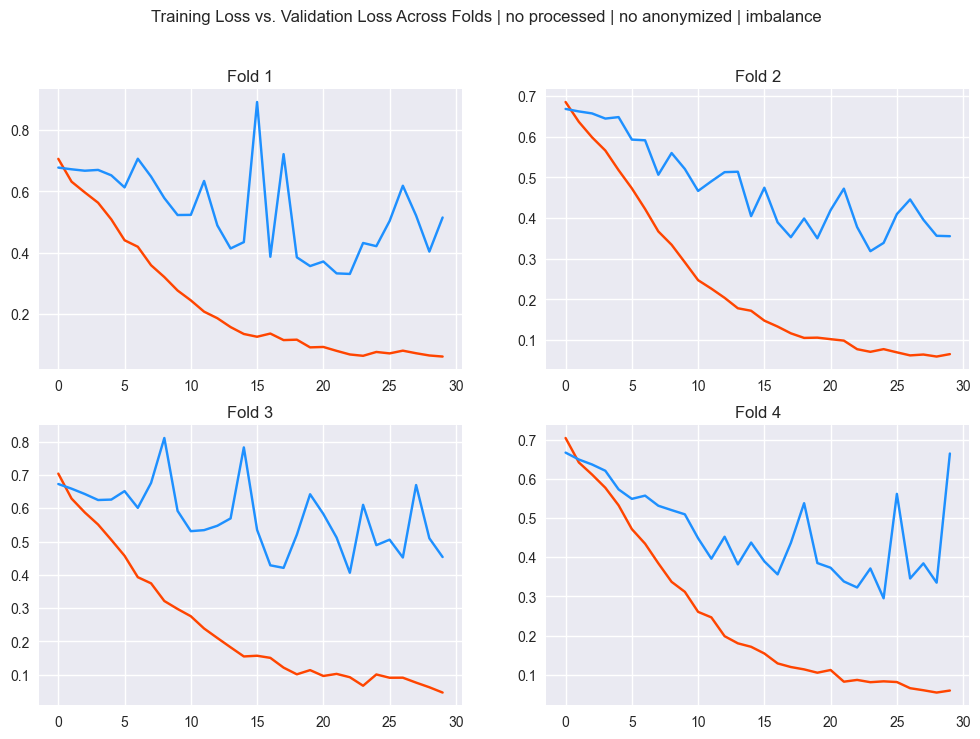

In [10]:
plotter.plot_subplots_curve(all_losses_1, all_val_losses_1, "Training Loss vs. Validation Loss Across Folds | no processed | no anonymized | imbalance ")

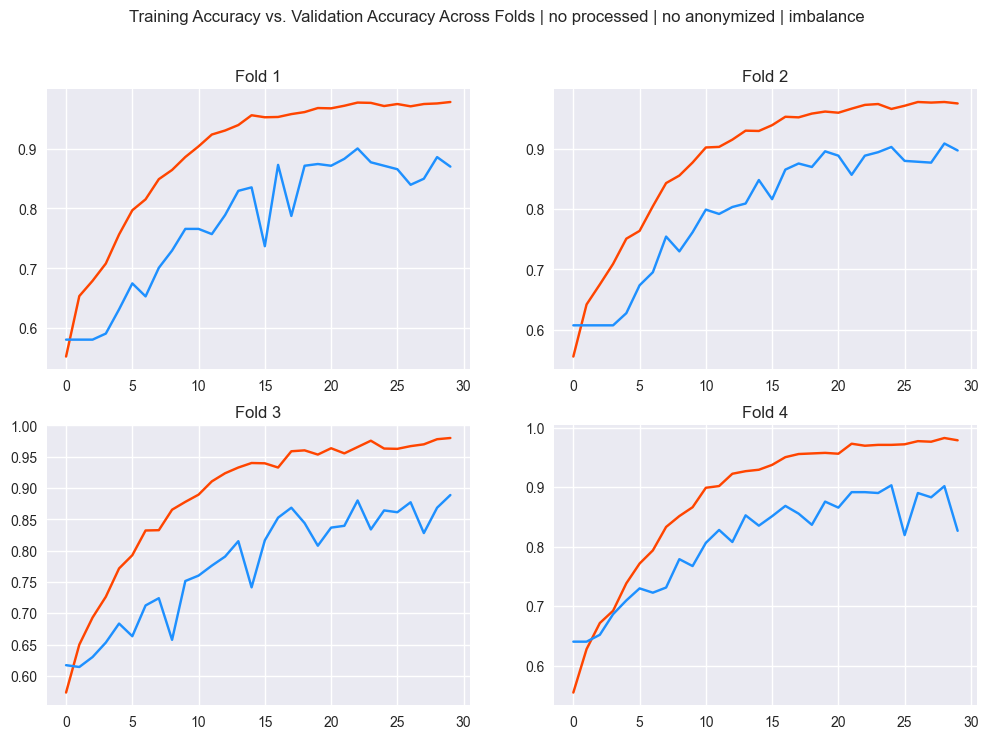

In [11]:
plotter.plot_subplots_curve(all_accuracies_1, all_val_accuracies_1, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | no anonymized | imbalance")

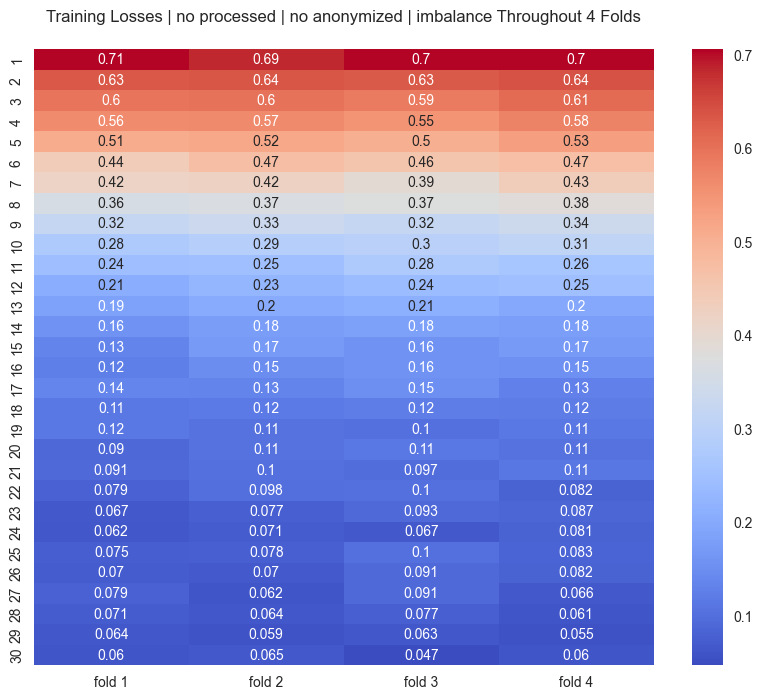

In [12]:
plotter.plot_heatmap(all_losses_1, "Training Losses | no processed | no anonymized | imbalance")

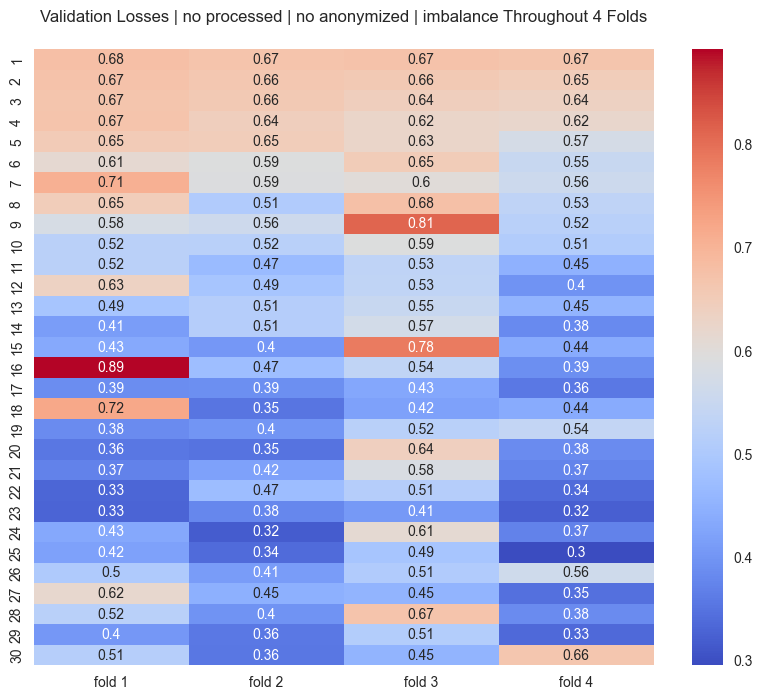

In [13]:
plotter.plot_heatmap(all_val_losses_1, "Validation Losses | no processed | no anonymized | imbalance")

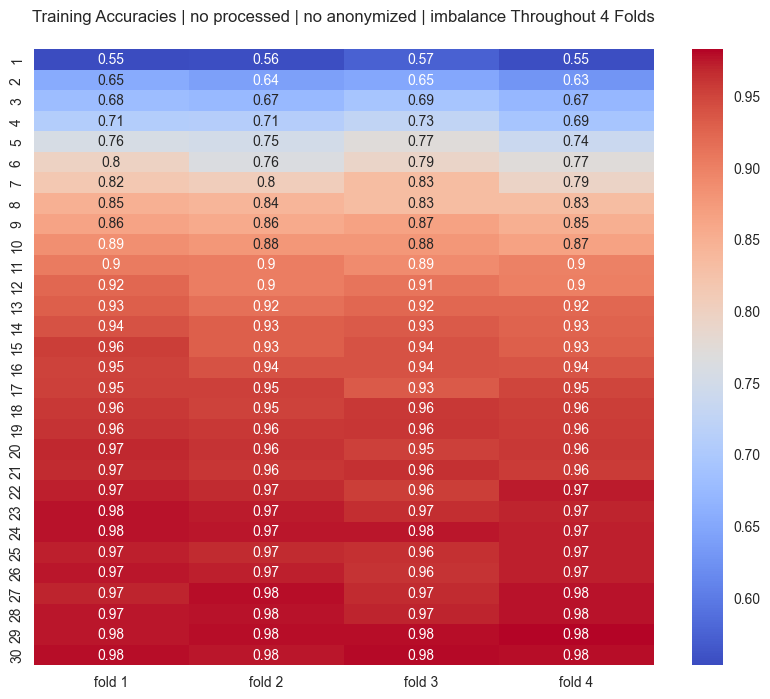

In [14]:
plotter.plot_heatmap(all_accuracies_1, "Training Accuracies | no processed | no anonymized | imbalance")

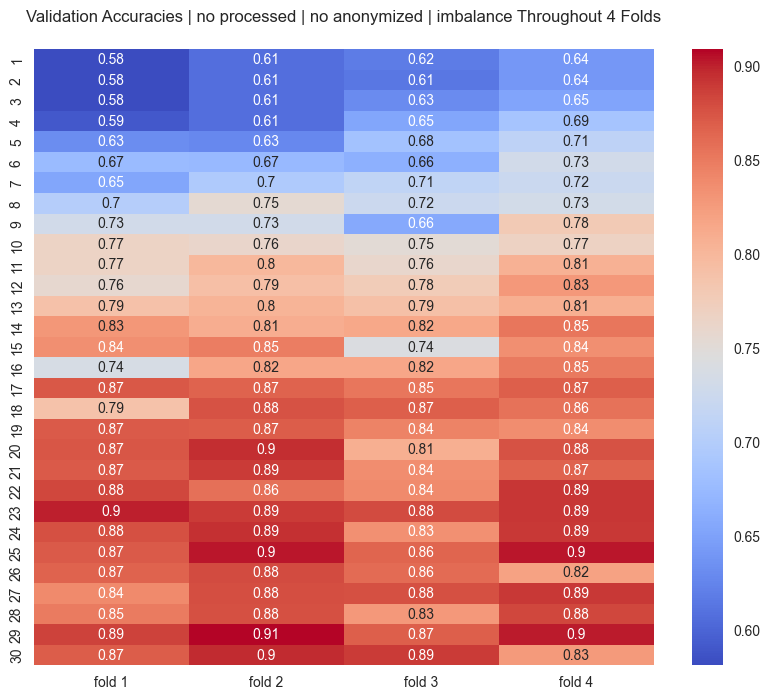

In [15]:
plotter.plot_heatmap(all_val_accuracies_1, "Validation Accuracies | no processed | no anonymized | imbalance")

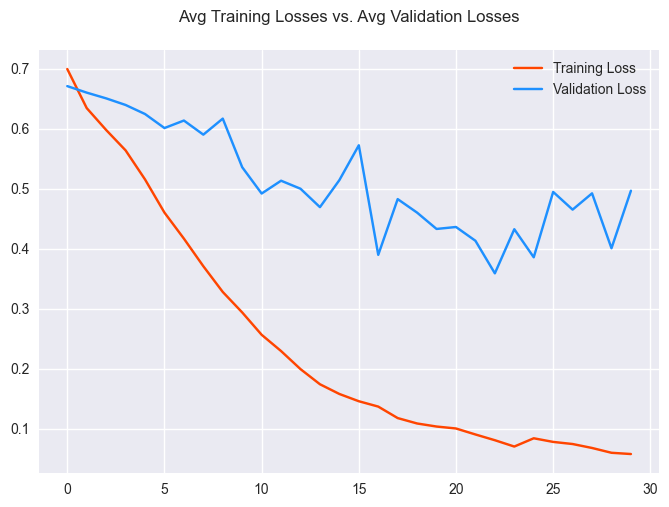

In [16]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_1, avg_val_loss_hist_1, "Training Loss", "Validation Loss")

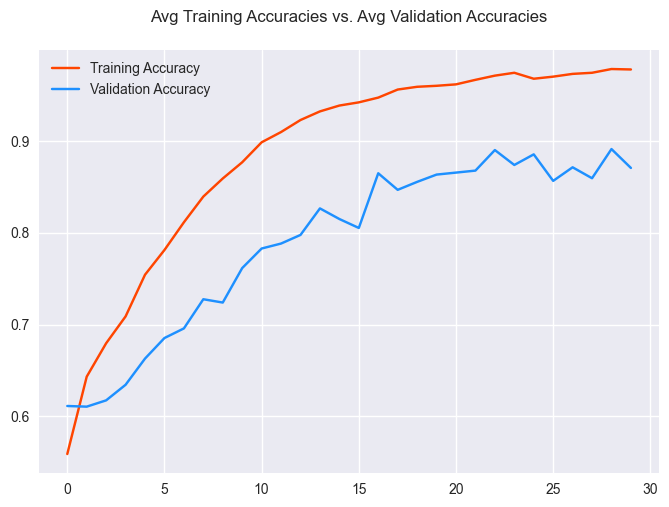

In [17]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_1, avg_val_acc_hist_1, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 3s 20ms/step


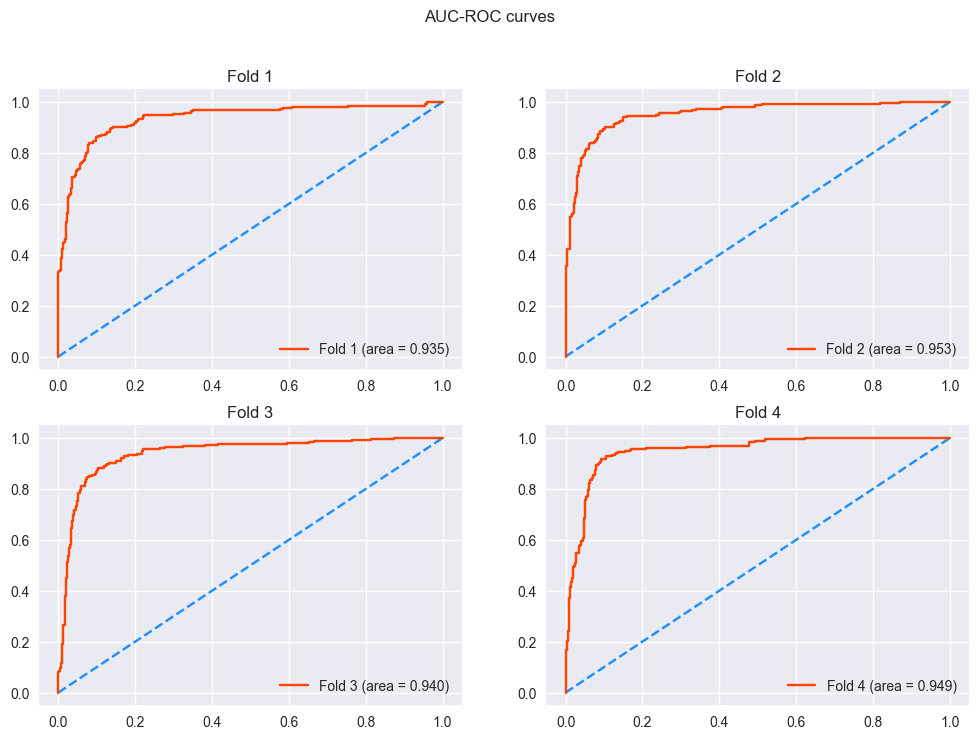

In [18]:
plotter.plot_roc_curve(all_models_1, X_test_vectors_1, y_test)

22/22 [==============================] - 0s 21ms/step


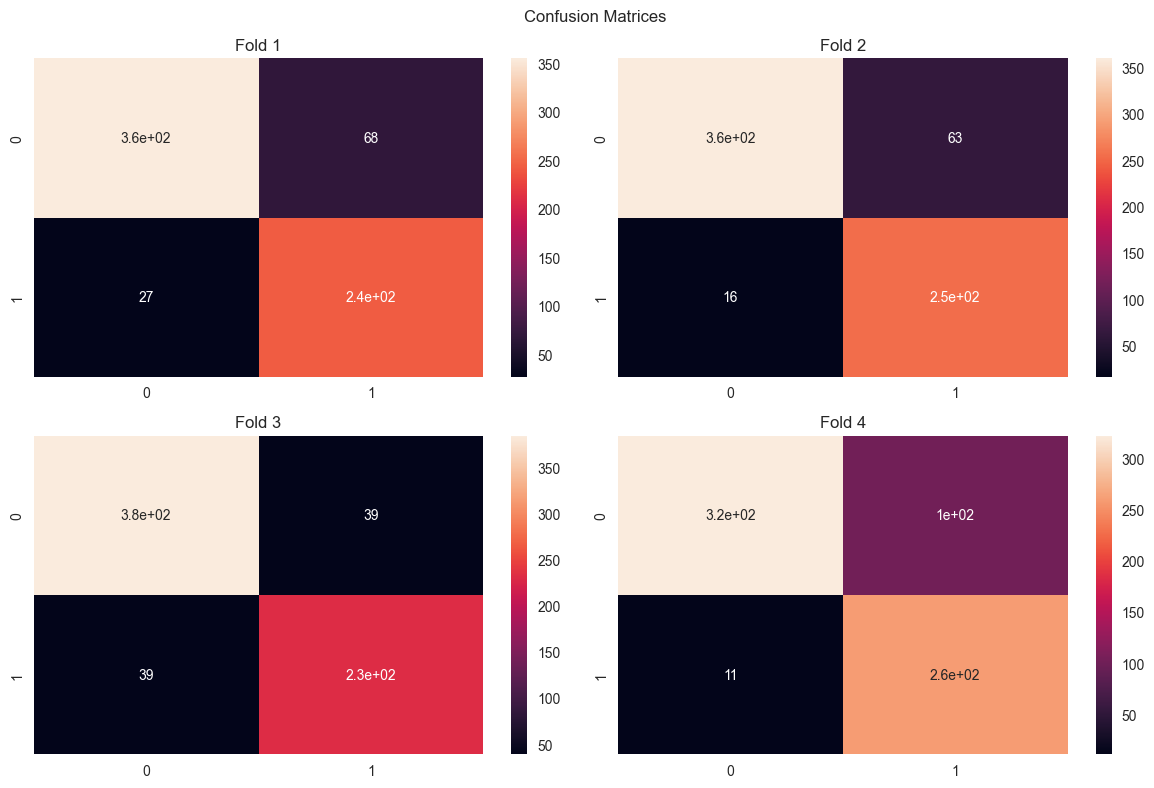

In [19]:
plotter.plot_confusion_matrix(all_models_1, X_test_vectors_1, y_test)

In [20]:
for i, trained_model in enumerate(all_models_1):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(
        trained_model, X_test_vectors_1, y_test))

Model 1:
22/22 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       423
           1       0.78      0.90      0.84       270

    accuracy                           0.86       693
   macro avg       0.86      0.87      0.86       693
weighted avg       0.87      0.86      0.86       693

Model 2:
22/22 [==============================] - 0s 19ms/step
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       423
           1       0.80      0.94      0.87       270

    accuracy                           0.89       693
   macro avg       0.88      0.90      0.88       693
weighted avg       0.90      0.89      0.89       693

Model 3:
22/22 [==============================] - 0s 22ms/step
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       423
           1       0.86      0.86      0.86     

In [21]:
print_testing_loss_accuracy(all_models_1, X_test_vectors_1, y_test)

model: 1
22/22 [==============================] - 0s 19ms/step - loss: 0.4825 - accuracy: 0.8629
model: 2
22/22 [==============================] - 1s 21ms/step - loss: 0.4530 - accuracy: 0.8860
model: 3
22/22 [==============================] - 1s 23ms/step - loss: 0.4023 - accuracy: 0.8874
model: 4
22/22 [==============================] - 0s 19ms/step - loss: 0.6069 - accuracy: 0.8384
average testing loss: 0.486
average testing accuracy: 0.869


### Combination 2: (No Processing - No Anonymization - Balancing)


In [22]:
balanced_df = preprocessor.balance_data(X_train["Facts"], y_train)
X_train_balanced = balanced_df["Facts"]
y_train_balanced = balanced_df["winner_index"]

In [23]:
glove_tokenizer_2, X_train_vectors_2 = preprocessor.convert_text_to_vectors_glove(X_train_balanced)

In [24]:
X_test_vectors_2 = preprocessor.convert_text_to_vectors_glove(X_test["Facts"], train=False, glove_tokenizer=glove_tokenizer_2)

In [25]:
global embedding_layer
embedding_layer = glove_model.generate_glove_embedding_layer(glove_tokenizer_2)

In [26]:
all_models_2, all_losses_2, all_val_losses_2, all_accuracies_2, all_val_accuracies_2 = train_model(build_glove_model, X_train_vectors_2, y_train_balanced)

fold: 1
Epoch 1/30
40/40 [==============================] - 20s 152ms/step - loss: 0.6882 - accuracy: 0.5633 - val_loss: 0.6871 - val_accuracy: 0.6118
Epoch 2/30
40/40 [==============================] - 3s 73ms/step - loss: 0.6293 - accuracy: 0.6523 - val_loss: 0.6682 - val_accuracy: 0.6438
Epoch 3/30
40/40 [==============================] - 3s 72ms/step - loss: 0.5687 - accuracy: 0.7028 - val_loss: 0.6361 - val_accuracy: 0.6639
Epoch 4/30
40/40 [==============================] - 3s 72ms/step - loss: 0.5022 - accuracy: 0.7580 - val_loss: 0.6097 - val_accuracy: 0.6509
Epoch 5/30
40/40 [==============================] - 3s 78ms/step - loss: 0.4417 - accuracy: 0.7899 - val_loss: 0.5748 - val_accuracy: 0.6840
Epoch 6/30
40/40 [==============================] - 3s 70ms/step - loss: 0.3780 - accuracy: 0.8352 - val_loss: 0.4986 - val_accuracy: 0.7669
Epoch 7/30
40/40 [==============================] - 3s 73ms/step - loss: 0.3189 - accuracy: 0.8648 - val_loss: 0.6209 - val_accuracy: 0.6675
Epo

In [28]:
avg_loss_hist_2, avg_val_loss_hist_2, avg_acc_hist_2, avg_val_acc_hist_2 = calculate_average_measures(
    all_losses_2, all_val_losses_2, all_accuracies_2, all_val_accuracies_2)


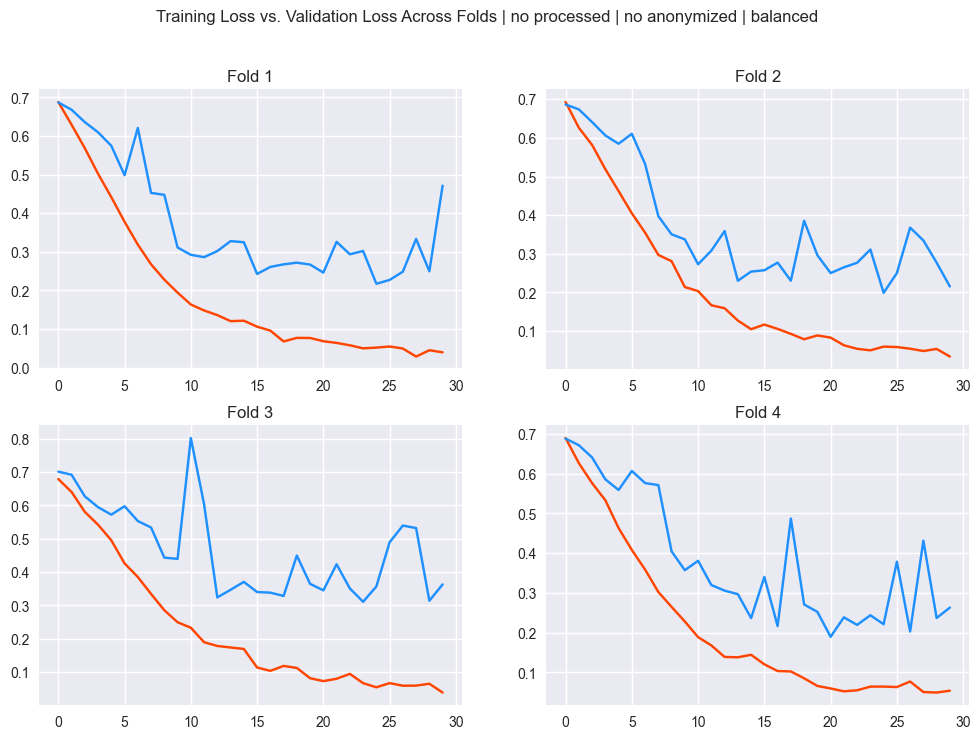

In [29]:
plotter.plot_subplots_curve(all_losses_2, all_val_losses_2,
                            "Training Loss vs. Validation Loss Across Folds | no processed | no anonymized | balanced ")


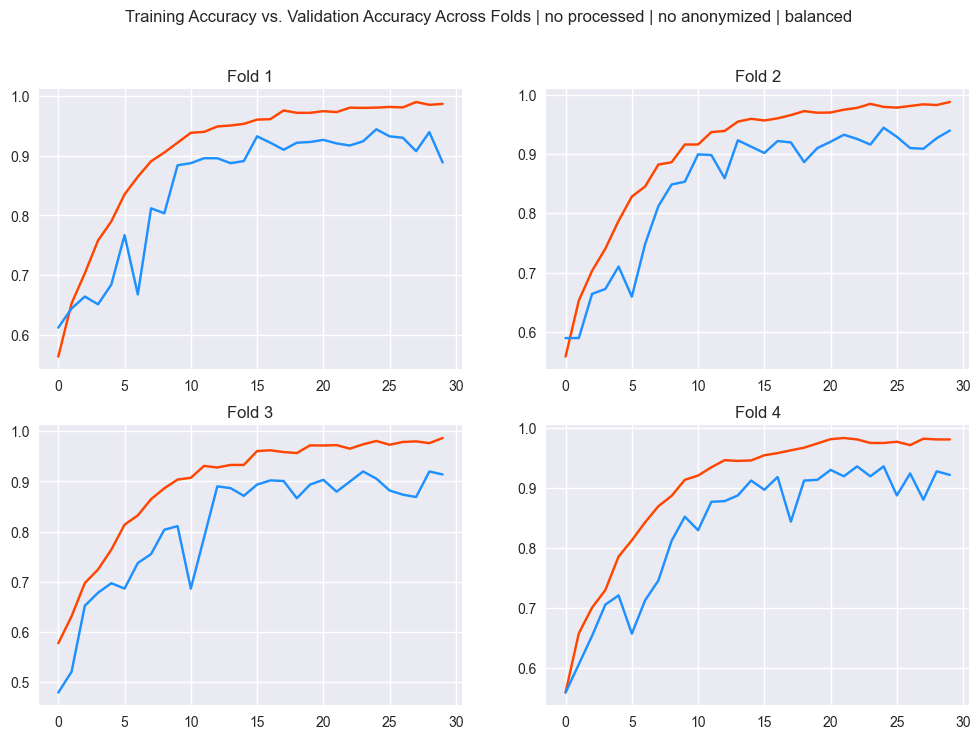

In [30]:
plotter.plot_subplots_curve(all_accuracies_2, all_val_accuracies_2,
                            "Training Accuracy vs. Validation Accuracy Across Folds | no processed | no anonymized | balanced")


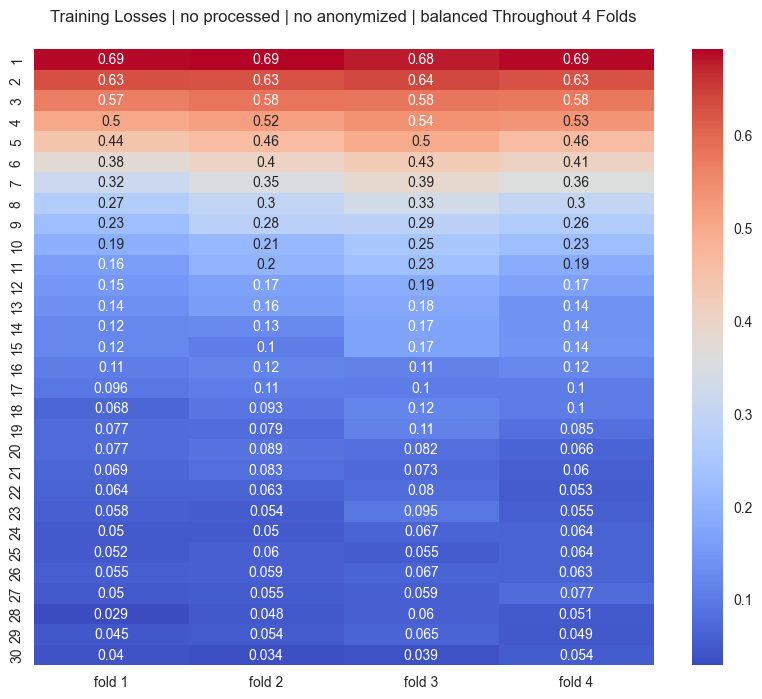

In [31]:
plotter.plot_heatmap(
    all_losses_2, "Training Losses | no processed | no anonymized | balanced")


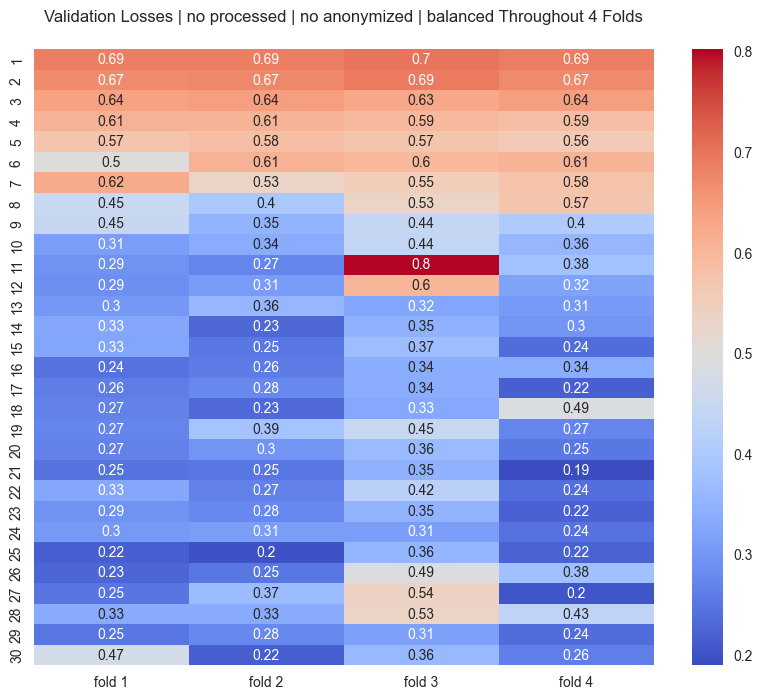

In [32]:
plotter.plot_heatmap(
    all_val_losses_2, "Validation Losses | no processed | no anonymized | balanced")


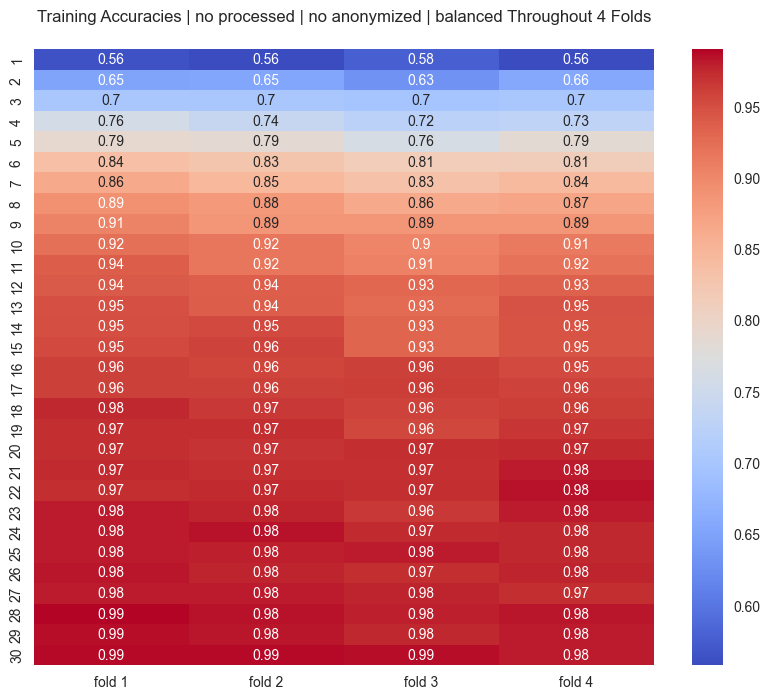

In [33]:
plotter.plot_heatmap(
    all_accuracies_2, "Training Accuracies | no processed | no anonymized | balanced")


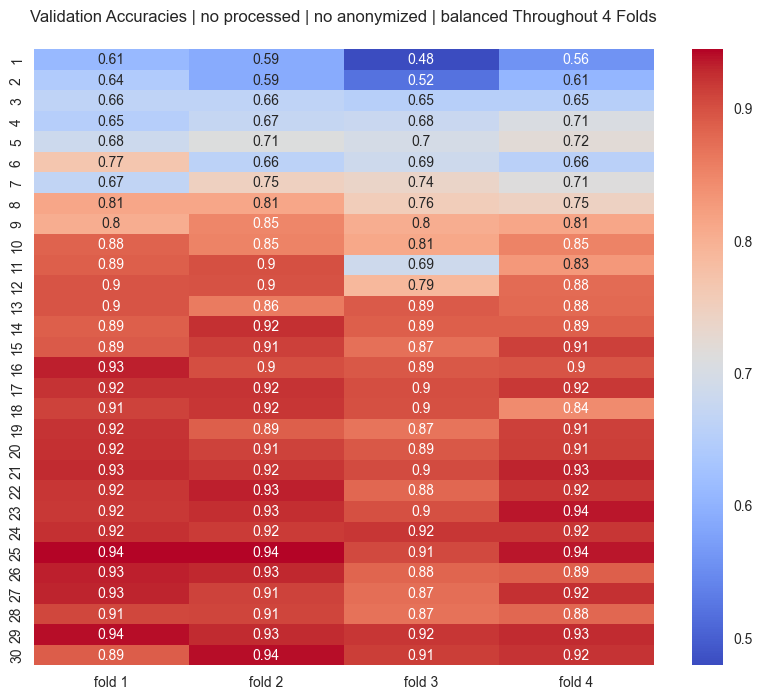

In [34]:
plotter.plot_heatmap(all_val_accuracies_2,
                     "Validation Accuracies | no processed | no anonymized | balanced")


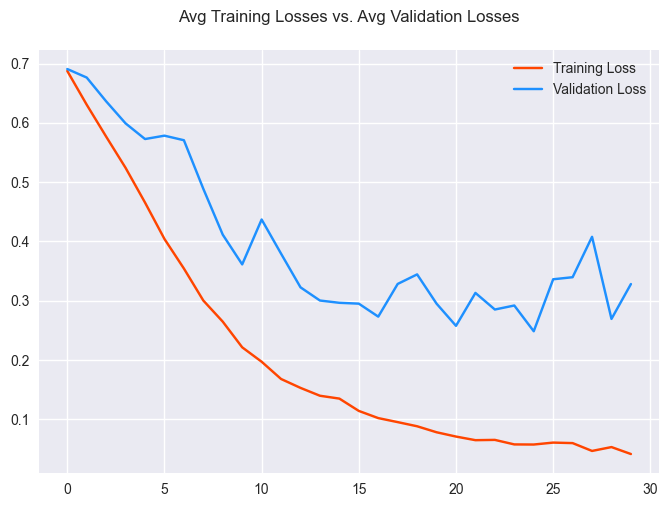

In [35]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses",
                            avg_loss_hist_2, avg_val_loss_hist_2, "Training Loss", "Validation Loss")


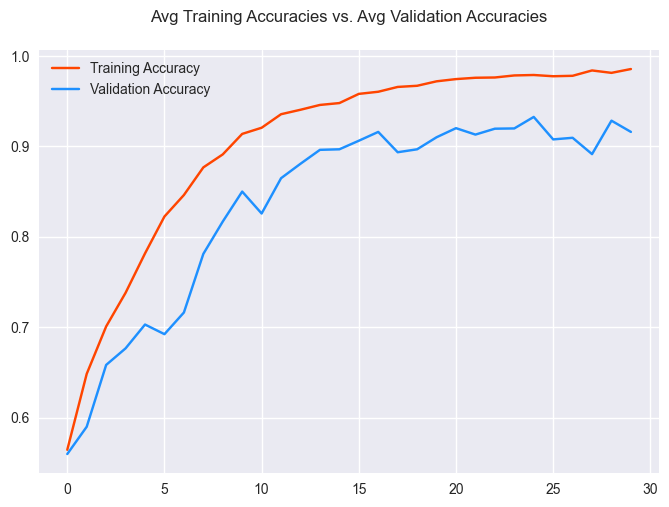

In [36]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies",
                            avg_acc_hist_2, avg_val_acc_hist_2, "Training Accuracy", "Validation Accuracy")


22/22 [==============================] - 3s 20ms/step


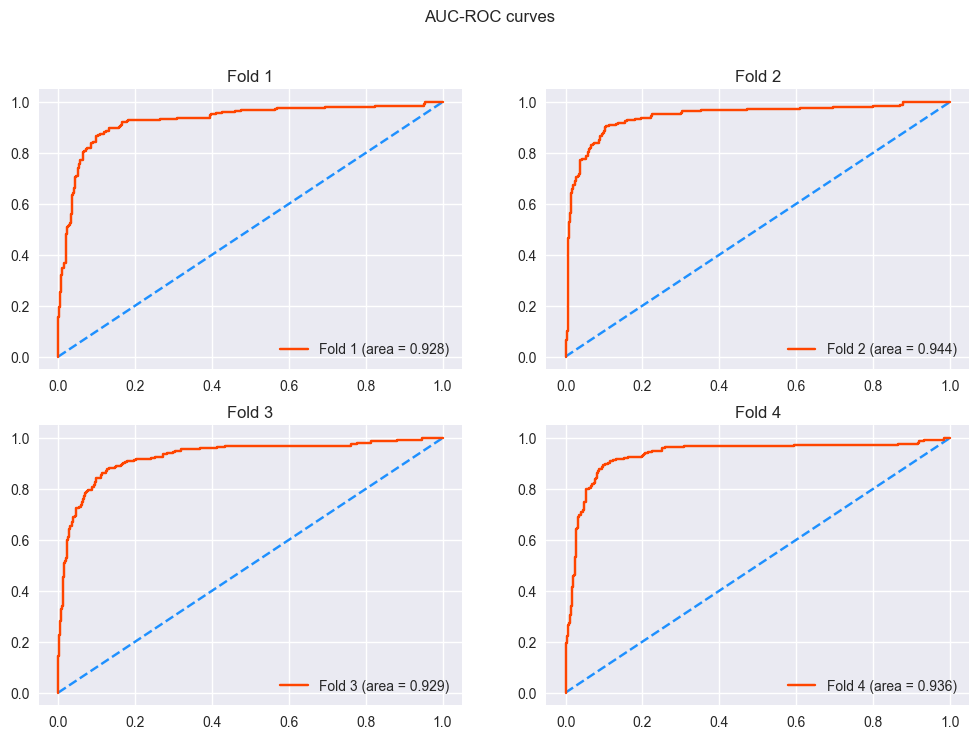

In [37]:
plotter.plot_roc_curve(all_models_2, X_test_vectors_2, y_test)


22/22 [==============================] - 1s 22ms/step


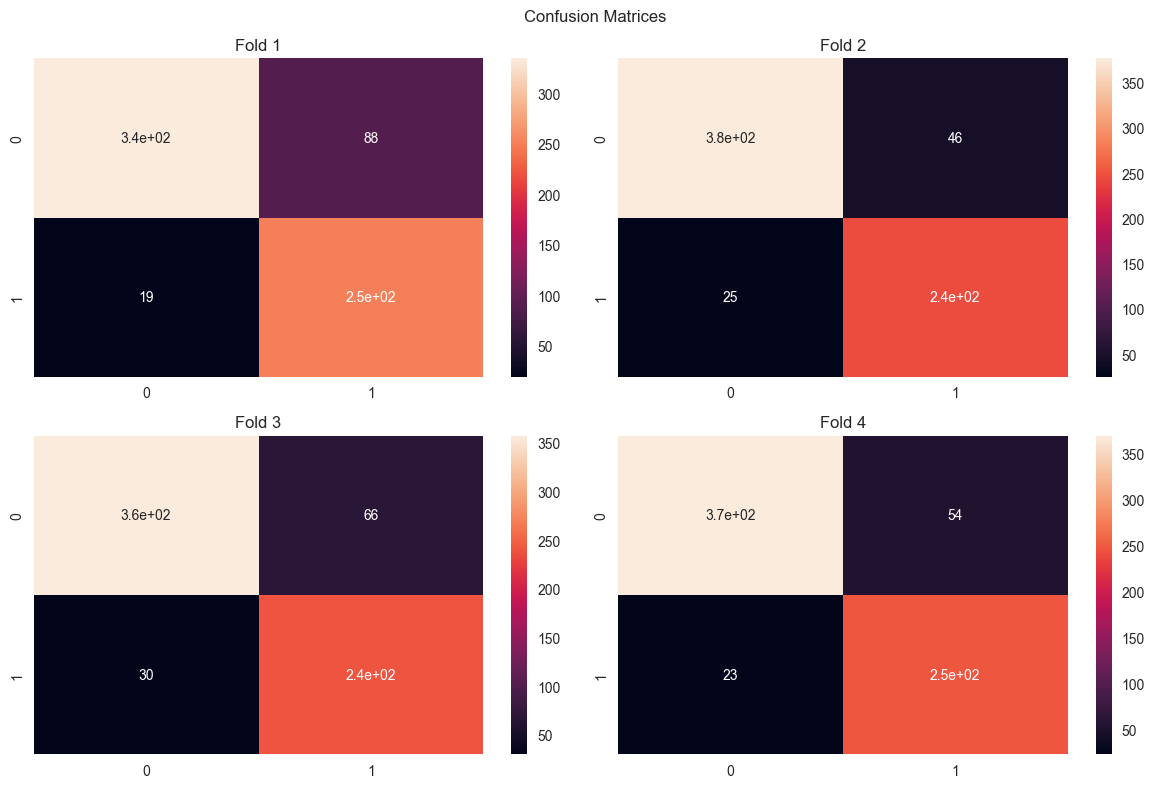

In [38]:
plotter.plot_confusion_matrix(all_models_2, X_test_vectors_2, y_test)


In [39]:
for i, trained_model in enumerate(all_models_2):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(
        trained_model, X_test_vectors_2, y_test))


Model 1:
22/22 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       423
           1       0.74      0.93      0.82       270

    accuracy                           0.85       693
   macro avg       0.84      0.86      0.84       693
weighted avg       0.87      0.85      0.85       693

Model 2:
22/22 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       423
           1       0.84      0.91      0.87       270

    accuracy                           0.90       693
   macro avg       0.89      0.90      0.89       693
weighted avg       0.90      0.90      0.90       693

Model 3:
22/22 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       423
           1       0.78      0.89      0.83     

In [40]:
print_testing_loss_accuracy(all_models_2, X_test_vectors_2, y_test)


model: 1
22/22 [==============================] - 0s 19ms/step - loss: 0.7060 - accuracy: 0.8456
model: 2
22/22 [==============================] - 0s 20ms/step - loss: 0.4626 - accuracy: 0.8975
model: 3
22/22 [==============================] - 0s 19ms/step - loss: 0.5412 - accuracy: 0.8615
model: 4
22/22 [==============================] - 0s 21ms/step - loss: 0.4748 - accuracy: 0.8889
average testing loss: 0.546
average testing accuracy: 0.873


### Combination 3: (No Processing - Anonymization - Imbalancing)


In [41]:
first_party_names_3 = X_train["first_party"]
second_party_names_3 = X_train["second_party"]
facts_3 = X_train["Facts"]

In [42]:
test_first_party_names_3 = X_test["first_party"]
test_second_party_names_3 = X_test["second_party"]
test_facts_3 = X_test["Facts"]

In [43]:
anonymized_facts_3 = preprocessor.anonymize_data(
    first_party_names_3, second_party_names_3, facts_3)
test_anonymized_facts_3 = preprocessor.anonymize_data(
    test_first_party_names_3, test_second_party_names_3, test_facts_3)

In [44]:
glove_tokenizer_3, X_train_vectors_3 = preprocessor.convert_text_to_vectors_glove(
    anonymized_facts_3)


In [45]:
X_test_vectors_3 = preprocessor.convert_text_to_vectors_glove(
    test_anonymized_facts_3, train=False, glove_tokenizer=glove_tokenizer_3)


In [46]:
global embedding_layer
embedding_layer = glove_model.generate_glove_embedding_layer(glove_tokenizer_3)

In [47]:
all_models_3, all_losses_3, all_val_losses_3, all_accuracies_3, all_val_accuracies_3 = train_model(
    build_glove_model, X_train_vectors_3, y_train)


fold: 1
Epoch 1/30
33/33 [==============================] - 20s 165ms/step - loss: 0.6913 - accuracy: 0.5464 - val_loss: 0.6764 - val_accuracy: 0.5809
Epoch 2/30
33/33 [==============================] - 2s 75ms/step - loss: 0.6378 - accuracy: 0.6402 - val_loss: 0.6697 - val_accuracy: 0.5809
Epoch 3/30
33/33 [==============================] - 2s 68ms/step - loss: 0.6106 - accuracy: 0.6643 - val_loss: 0.6547 - val_accuracy: 0.5896
Epoch 4/30
33/33 [==============================] - 2s 69ms/step - loss: 0.5707 - accuracy: 0.6970 - val_loss: 0.6312 - val_accuracy: 0.6214
Epoch 5/30
33/33 [==============================] - 2s 76ms/step - loss: 0.5246 - accuracy: 0.7364 - val_loss: 0.6409 - val_accuracy: 0.6257
Epoch 6/30
33/33 [==============================] - 2s 67ms/step - loss: 0.4833 - accuracy: 0.7816 - val_loss: 0.5669 - val_accuracy: 0.6835
Epoch 7/30
33/33 [==============================] - 2s 72ms/step - loss: 0.4220 - accuracy: 0.8004 - val_loss: 0.6110 - val_accuracy: 0.6705
Epo

In [48]:
avg_loss_hist_3, avg_val_loss_hist_3, avg_acc_hist_3, avg_val_acc_hist_3 = calculate_average_measures(
    all_losses_3, all_val_losses_3, all_accuracies_3, all_val_accuracies_3)


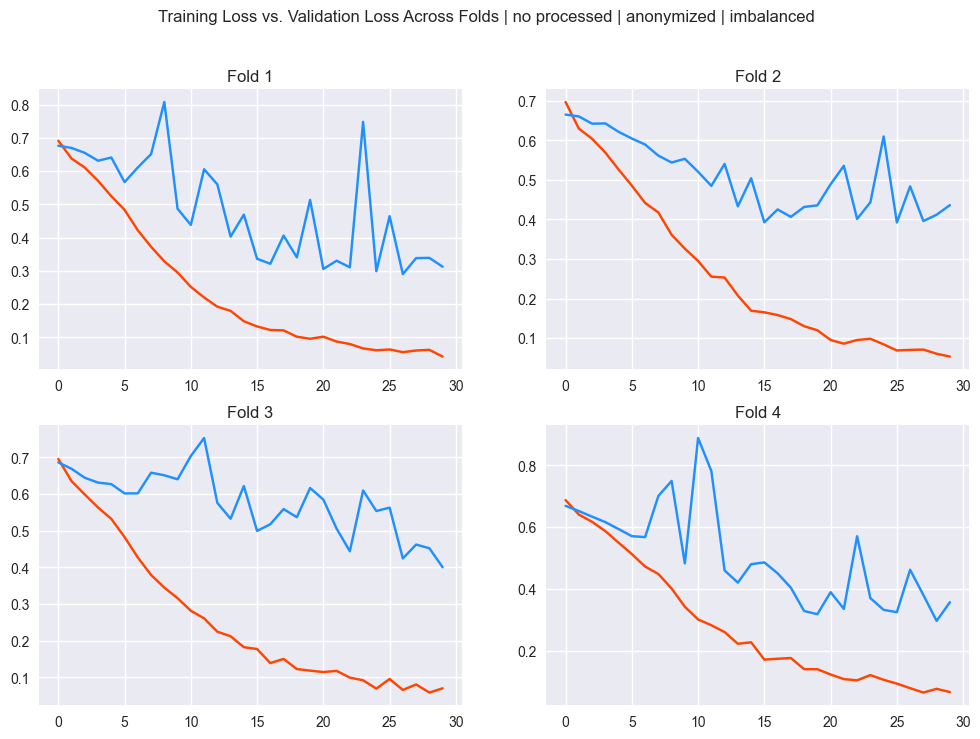

In [49]:
plotter.plot_subplots_curve(all_losses_3, all_val_losses_3,
                            "Training Loss vs. Validation Loss Across Folds | no processed | anonymized | imbalanced ")


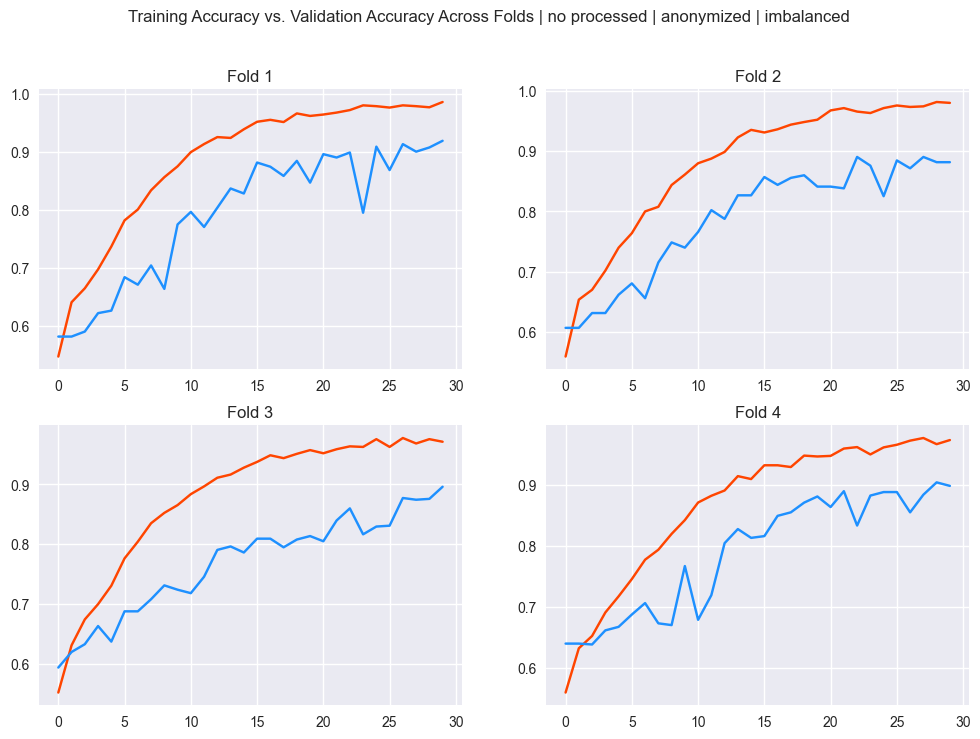

In [50]:
plotter.plot_subplots_curve(all_accuracies_3, all_val_accuracies_3,
                            "Training Accuracy vs. Validation Accuracy Across Folds | no processed | anonymized | imbalanced")


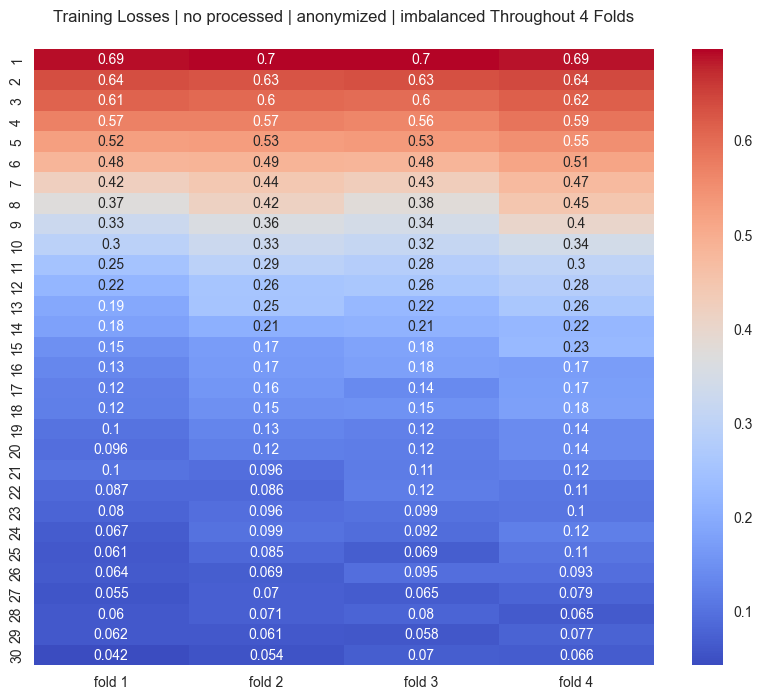

In [51]:
plotter.plot_heatmap(
    all_losses_3, "Training Losses | no processed | anonymized | imbalanced")


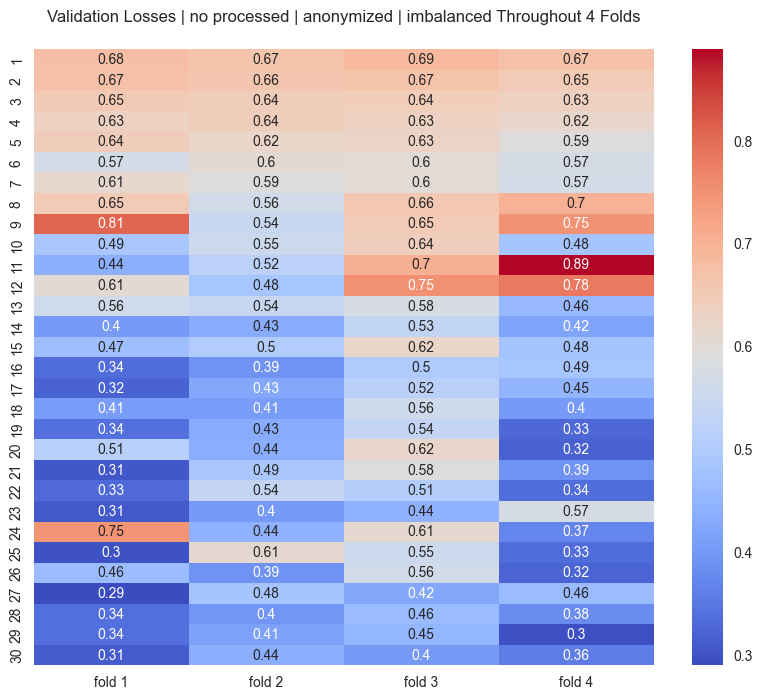

In [52]:
plotter.plot_heatmap(
    all_val_losses_3, "Validation Losses | no processed | anonymized | imbalanced")


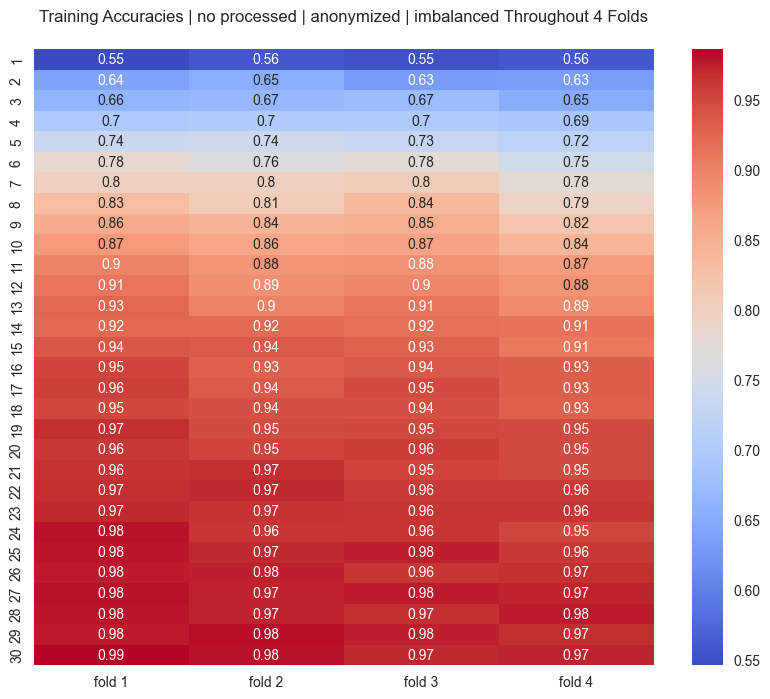

In [53]:
plotter.plot_heatmap(
    all_accuracies_3, "Training Accuracies | no processed | anonymized | imbalanced")


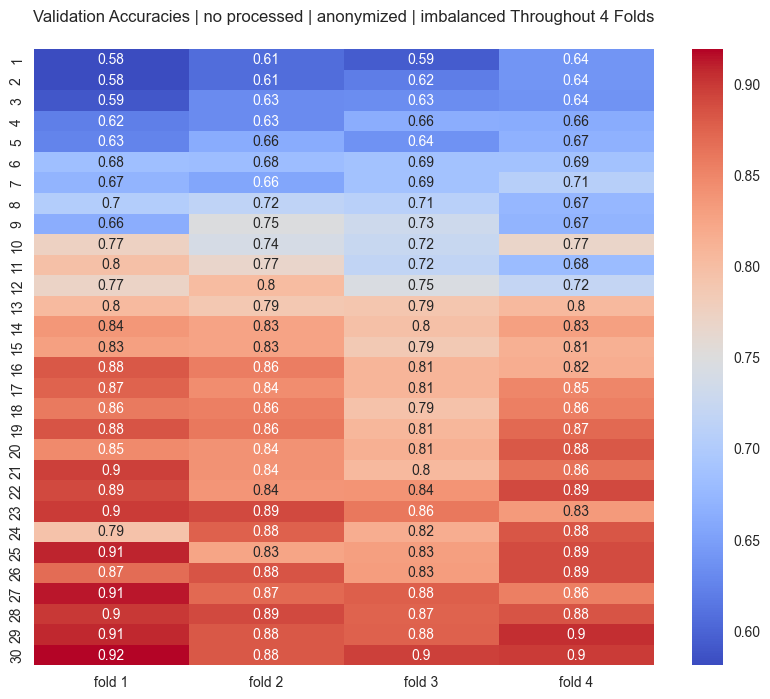

In [54]:
plotter.plot_heatmap(all_val_accuracies_3,
                     "Validation Accuracies | no processed | anonymized | imbalanced")


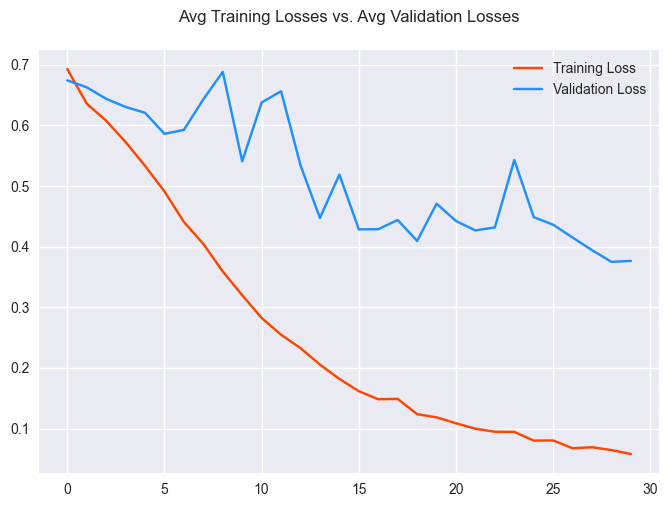

In [55]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses",
                            avg_loss_hist_3, avg_val_loss_hist_3, "Training Loss", "Validation Loss")


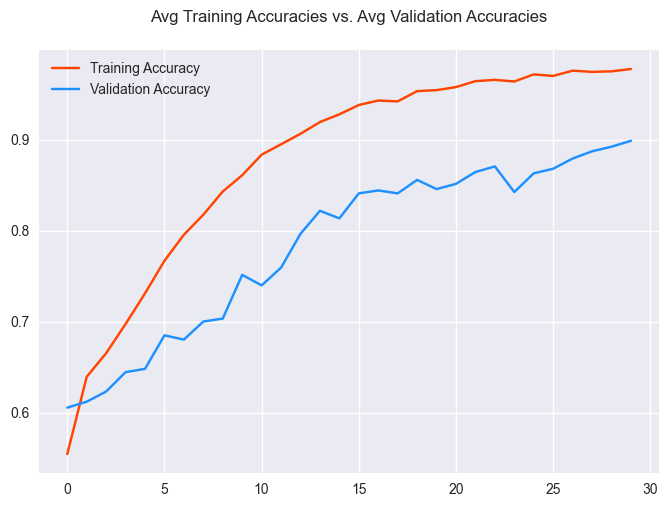

In [56]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies",
                            avg_acc_hist_3, avg_val_acc_hist_3, "Training Accuracy", "Validation Accuracy")


22/22 [==============================] - 17s 79ms/step


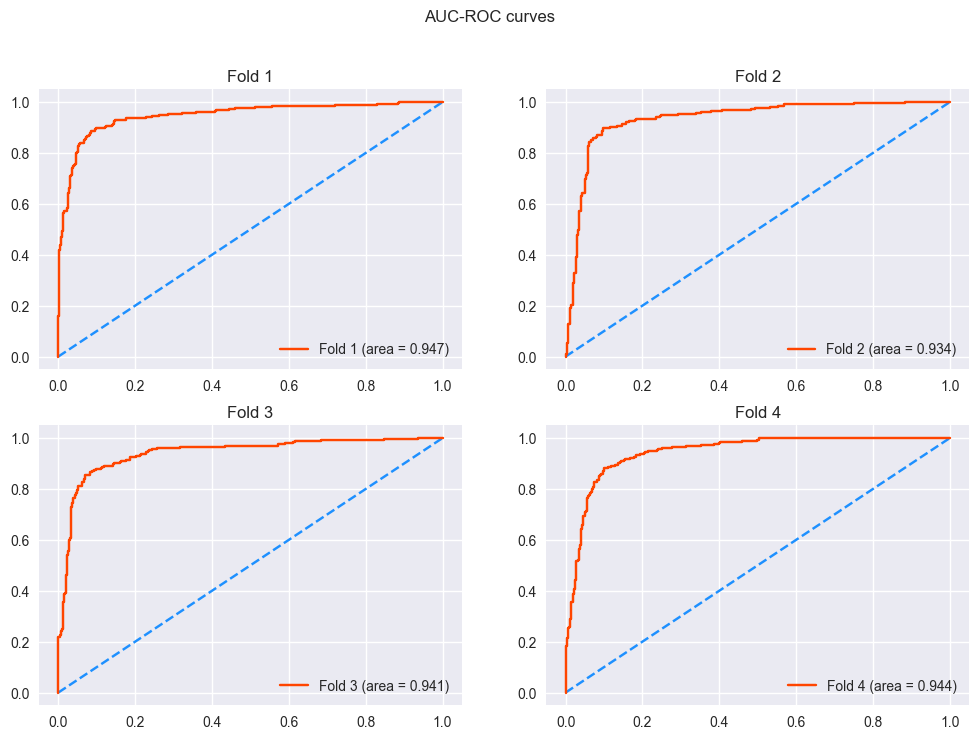

In [57]:
plotter.plot_roc_curve(all_models_3, X_test_vectors_3, y_test)


22/22 [==============================] - 1s 64ms/step


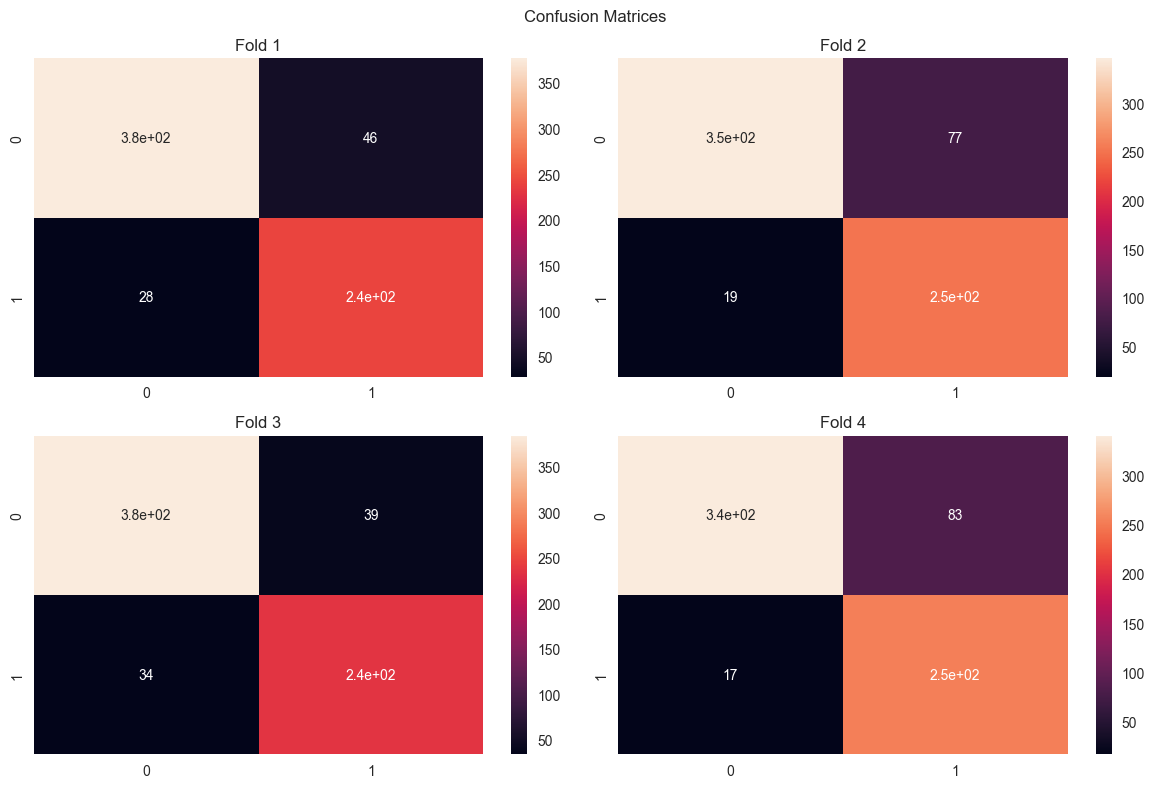

In [58]:
plotter.plot_confusion_matrix(all_models_3, X_test_vectors_3, y_test)


In [59]:
for i, trained_model in enumerate(all_models_3):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(
        trained_model, X_test_vectors_3, y_test))


Model 1:
22/22 [==============================] - 1s 57ms/step
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       423
           1       0.84      0.90      0.87       270

    accuracy                           0.89       693
   macro avg       0.89      0.89      0.89       693
weighted avg       0.90      0.89      0.89       693

Model 2:
22/22 [==============================] - 2s 67ms/step
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       423
           1       0.77      0.93      0.84       270

    accuracy                           0.86       693
   macro avg       0.86      0.87      0.86       693
weighted avg       0.88      0.86      0.86       693

Model 3:
22/22 [==============================] - 2s 72ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       423
           1       0.86      0.87      0.87     

In [60]:
print_testing_loss_accuracy(all_models_3, X_test_vectors_3, y_test)


model: 1
22/22 [==============================] - 2s 67ms/step - loss: 0.3855 - accuracy: 0.8932
model: 2
22/22 [==============================] - 2s 65ms/step - loss: 0.5249 - accuracy: 0.8615
model: 3
22/22 [==============================] - 2s 68ms/step - loss: 0.3975 - accuracy: 0.8947
model: 4
22/22 [==============================] - 1s 62ms/step - loss: 0.4730 - accuracy: 0.8557
average testing loss: 0.445
average testing accuracy: 0.876


### Combination 4: (No Processing - Anonymization - Balancing)


In [61]:
first_party_names_4 = X_train["first_party"]
second_party_names_4 = X_train["second_party"]
facts_4 = X_train["Facts"]


In [62]:
test_first_party_names_4 = X_test["first_party"]
test_second_party_names_4 = X_test["second_party"]
test_facts_4 = X_test["Facts"]


In [63]:
anonymized_facts_4 = preprocessor.anonymize_data(
    first_party_names_4, second_party_names_4, facts_4)
test_anonymized_facts_4 = preprocessor.anonymize_data(
    test_first_party_names_4, test_second_party_names_4, test_facts_4)


In [64]:
balanced_anonymized_df = preprocessor.balance_data(anonymized_facts_4, y_train)
balanced_anonymized_df = balanced_anonymized_df.rename(columns={0: "Facts"})

In [65]:
X_train_balanced_anonymized = balanced_anonymized_df["Facts"]
y_train_balanced_anonymized = balanced_anonymized_df["winner_index"]


In [66]:
glove_tokenizer_4, X_train_vectors_4 = preprocessor.convert_text_to_vectors_glove(
    X_train_balanced_anonymized)


In [67]:
X_test_vectors_4 = preprocessor.convert_text_to_vectors_glove(
    test_anonymized_facts_4, train=False, glove_tokenizer=glove_tokenizer_4)


In [68]:
global embedding_layer
embedding_layer = glove_model.generate_glove_embedding_layer(glove_tokenizer_4)

In [69]:
all_models_4, all_losses_4, all_val_losses_4, all_accuracies_4, all_val_accuracies_4 = train_model(
    build_glove_model, X_train_vectors_4, y_train_balanced_anonymized)


fold: 1
Epoch 1/30
40/40 [==============================] - 87s 621ms/step - loss: 0.6907 - accuracy: 0.5487 - val_loss: 0.6937 - val_accuracy: 0.4781
Epoch 2/30
40/40 [==============================] - 10s 251ms/step - loss: 0.6445 - accuracy: 0.6279 - val_loss: 0.6752 - val_accuracy: 0.5704
Epoch 3/30
40/40 [==============================] - 10s 251ms/step - loss: 0.5924 - accuracy: 0.6736 - val_loss: 0.6470 - val_accuracy: 0.6367
Epoch 4/30
40/40 [==============================] - 10s 264ms/step - loss: 0.5372 - accuracy: 0.7387 - val_loss: 0.6010 - val_accuracy: 0.6781
Epoch 5/30
40/40 [==============================] - 11s 266ms/step - loss: 0.4671 - accuracy: 0.7864 - val_loss: 0.5584 - val_accuracy: 0.7231
Epoch 6/30
21/40 [==============>...............] - ETA: 4s - loss: 0.3943 - accuracy: 0.8155

KeyboardInterrupt: 

In [ ]:
avg_loss_hist_4, avg_val_loss_hist_4, avg_acc_hist_4, avg_val_acc_hist_4 = calculate_average_measures(all_losses_4, all_val_losses_4, all_accuracies_4, all_val_accuracies_4)

In [ ]:
plotter.plot_subplots_curve(all_losses_4, all_val_losses_4,
                            "Training Loss vs. Validation Loss Across Folds | no processed | anonymized | balanced ")


In [ ]:
plotter.plot_subplots_curve(all_accuracies_4, all_val_accuracies_4,
                            "Training Accuracy vs. Validation Accuracy Across Folds | no processed | anonymized | balanced")


In [ ]:
plotter.plot_heatmap(
    all_losses_4, "Training Losses | no processed | anonymized | balanced")


In [ ]:
plotter.plot_heatmap(
    all_val_losses_4, "Validation Losses | no processed | anonymized | balanced")


In [ ]:
plotter.plot_heatmap(
    all_accuracies_4, "Training Accuracies | no processed | anonymized | balanced")


In [ ]:
plotter.plot_heatmap(all_val_accuracies_4,
                     "Validation Accuracies | no processed | anonymized | balanced")


In [ ]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses",
                            avg_loss_hist_4, avg_val_loss_hist_4, "Training Loss", "Validation Loss")


In [ ]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies",
                            avg_acc_hist_4, avg_val_acc_hist_4, "Training Accuracy", "Validation Accuracy")


In [ ]:
plotter.plot_roc_curve(all_models_4, X_test_vectors_4, y_test)


In [ ]:
plotter.plot_confusion_matrix(all_models_4, X_test_vectors_4, y_test)


In [ ]:
for i, trained_model in enumerate(all_models_4):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(
        trained_model, X_test_vectors_4, y_test))


In [ ]:
print_testing_loss_accuracy(all_models_4, X_test_vectors_4, y_test)
